# Try the plotting module (original SW)

In [1]:
import numpy as np
from scenewalk.scenewalk_model_object import scenewalk as scenewalk_obj
from scenewalk.plotting import sw_plot as swplt
from matplotlib import pyplot as plt
import sw_plot
from collections import OrderedDict

In [2]:
d_range = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_range.npy")
dur_dat = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_dur.npy")
im_dat = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_im.npy")
x_dat = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_x.npy")
y_dat = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_y.npy")
dens_dat = np.load("/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/npy_unclean/corpus_densities.npy")

In [3]:
vp= 6
trial=57
nfixes = 11
x_path = x_dat[vp-1][trial-1][0:nfixes]
y_path = y_dat[vp-1][trial-1][0:nfixes]
dur_path = dur_dat[vp-1][trial-1][0:nfixes]
im = im_dat[vp-1][trial-1][0]
fix_density_map = dens_dat[im-1]

In [4]:
im_file = "/Users/lisa/Documents/SFB1294_B05/SceneWalk/Scenewalk_python/DATA/corpusData/corpus_images/%02d.jpg" % (im,)
from PIL import Image
myImage = Image.open(im_file);
myImage = myImage.convert('LA')
im_sz = myImage.size
im_x = im_sz[0]
im_y = im_sz[1]

In [5]:
#plt.imshow(myImage)

In [6]:
kwargs_d = {}
sw_args = ['subtractive', 'zero','off', 2, 'off', {'x': d_range[0], 'y': d_range[1]}, kwargs_d]

In [7]:
sw_params = OrderedDict({
    "omegaAttention" : 5,
    "omegaInhib" : 0.4,
    "sigmaAttention" : 6,
    "sigmaInhib" : 2,
    "gamma" : 1,
    "lamb" : 1,
    "inhibStrength" : 0.3,
    "zeta" : 0.007,
    #"sigmaShift" : 2,
    #"shift_size" : 2,
    #"phi" : 1,
    "first_fix_OmegaAttention" : 1,
    "cb_sd_x" : 7,
    "cb_sd_y" : 5
})


In [8]:
sw = scenewalk_obj(*sw_args)
sw.get_param_list_order()

['omegaAttention',
 'omegaInhib',
 'sigmaAttention',
 'sigmaInhib',
 'gamma',
 'lamb',
 'inhibStrength',
 'zeta']

In [9]:


sw.update_params(sw_params)

In [10]:
sw.get_params()

OrderedDict([('omegaAttention', 5),
             ('omegaInhib', 0.4),
             ('sigmaAttention', 6),
             ('sigmaInhib', 2),
             ('gamma', 1),
             ('lamb', 1),
             ('inhibStrength', 0.3),
             ('zeta', 0.007)])

1
2
3
4
5
6
7
8
9
10
animating
saving
showing


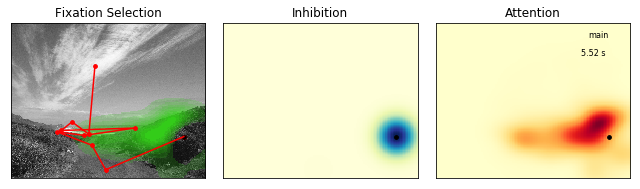

In [11]:
sw_plot.plot_dynamic_shifts_image(sw, fix_density_map, x_path, y_path, dur_path, "original_scenewalk.mp4", myImage, 80)

In [12]:
#import matplotlib.animation as animation

In [13]:
#sw_plot.plot_dynamic(sw, fix_density_map, x_path, y_path, dur_path, "asd2.mp4")